# Assignment 1: Data Curation
### Data 512
### Sunday, September 29
### Tara Wilson

Python version 3.7

### Data Acquisiton

In [21]:
# import libraries needed to download data
import json
import requests
import pandas as pd
import numpy as np

In [2]:
def make_and_save_api_call(endpoint, params, filename):
    call = requests.get(endpoint.format(**params))
    response = call.json()
    with open(filename, "w", encoding="utf-8") as file:
        json.dump(response, file)

In [3]:
# pageview counts for a project, desktop access
pageview_desktop_endpoint = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}"

pageview_desktop_params = {"project": "en.wikipedia.org",
                           "access": "desktop",
                            "agent": "user",
                            "granularity": "monthly",
                            "start": "2015070100",
                            "end": "2019083000"
                           }

make_and_save_api_call(pageview_desktop_endpoint, pageview_desktop_params, "pageviews_desktop_201507-201908.json")

In [4]:
# pageview counts for a project, mobile app access
pageview_mobile_app_endpoint = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}"

pageview_mobile_app_params = {"project": "en.wikipedia.org",
                           "access": "mobile-app",
                            "agent": "user",
                            "granularity": "monthly",
                            "start": "2015070100",
                            "end": "2019083000"
                           }

make_and_save_api_call(pageview_mobile_app_endpoint, pageview_mobile_app_params, "pageviews_mobile-app_201507-201908.json")

In [5]:
# pageview counts for a project, mobile web access
pageview_mobile_web_endpoint = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}"

pageview_mobile_web_params = {"project": "en.wikipedia.org",
                           "access": "mobile-web",
                            "agent": "user",
                            "granularity": "monthly",
                            "start": "2015070100",
                            "end": "2019083000"
                           }

make_and_save_api_call(pageview_mobile_web_endpoint, pageview_mobile_web_params, "pageviews_mobile-web_201507-201908.json")

In [6]:
# legacy pageview data, mobile access
legacy_pagecount_mobile_endpoint = "https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}"

legacy_pagecount_mobile_params = {"project": "en.wikipedia.org",
                           "access-site": "mobile-site",
                            "granularity": "monthly",
                            "start": "2007120100",
                            "end": "2016073100"
                           }

make_and_save_api_call(legacy_pagecount_mobile_endpoint, legacy_pagecount_mobile_params, "pagecounts_mobile-site_200712-201607.json")

In [7]:
# legacy pageview data, desktop access
legacy_pageview_desktop_endpoint = "https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}"

legacy_pageview_desktop_params = {"project": "en.wikipedia.org",
                           "access-site": "desktop-site",
                            "granularity": "monthly",
                            "start": "2007120100",
                            "end": "2016073100"
                           }

make_and_save_api_call(legacy_pageview_desktop_endpoint, legacy_pageview_desktop_params, "pagecounts_desktop-site_200712-201607.json")

### Data processing

In [8]:
pageviews_mobile_app = pd.read_json("pageviews_mobile-app_201507-201908.json")["items"]

pageviews_mobile_app_df = pd.DataFrame({})
timestamp = []
count = []
for row in pageviews_mobile_app:
    timestamp.append(row["timestamp"])
    count.append(row["views"])
    
pageviews_mobile_app_df["timestamp"] = timestamp
pageviews_mobile_app_df["pageview_mobile_views"] = count

In [9]:
pageviews_mobile_web = pd.read_json("pageviews_mobile-web_201507-201908.json")["items"]

pageviews_mobile_web_df = pd.DataFrame({})
timestamp = []
count = []
for row in pageviews_mobile_web:
    timestamp.append(row["timestamp"])
    count.append(row["views"])
    
pageviews_mobile_web_df["timestamp"] = timestamp
pageviews_mobile_web_df["pageview_mobile_views"] = count

In [10]:
pageviews_mobile_web_df = pageviews_mobile_web_df.set_index(["timestamp"])
pageviews_mobile_app_df = pageviews_mobile_app_df.set_index(["timestamp"])

pageviews_mobile = pageviews_mobile_web_df + pageviews_mobile_app_df

In [11]:
pageviews_desktop = pd.read_json("pageviews_desktop_201507-201908.json")["items"]

pageviews_desktop_df = pd.DataFrame({})
timestamp = []
count = []
for row in pageviews_desktop:
    timestamp.append(row["timestamp"])
    count.append(row["views"])
    
pageviews_desktop_df["timestamp"] = timestamp
pageviews_desktop_df["pageview_desktop_views"] = count

pageviews_desktop_df = pageviews_desktop_df.set_index(["timestamp"])

In [12]:
pagecounts_desktop = pd.read_json("pagecounts_desktop-site_200801-201607.json")["items"]

pagecounts_desktop_df = pd.DataFrame({})
timestamp = []
count = []
for row in pagecounts_desktop:
    timestamp.append(row["timestamp"])
    count.append(row["count"])
    
pagecounts_desktop_df["timestamp"] = timestamp
pagecounts_desktop_df["pagecount_desktop_views"] = count

pagecounts_desktop_df = pagecounts_desktop_df.set_index(["timestamp"])

In [13]:
pagecounts_mobile = pd.read_json("pagecounts_mobile-site_200801-201607.json")["items"]

pagecounts_mobile_df = pd.DataFrame({})
timestamp = []
count = []
for row in pagecounts_mobile:
    timestamp.append(row["timestamp"])
    count.append(row["count"])
    
pagecounts_mobile_df["timestamp"] = timestamp
pagecounts_mobile_df["pagecount_mobile_views"] = count

pagecounts_mobile_df = pagecounts_mobile_df.set_index(["timestamp"])

In [14]:
all_data = pageviews_mobile.join(pageviews_desktop_df).join(pagecounts_desktop_df, how="outer").join(pagecounts_mobile_df, how="outer")

all_data[np.isnan(all_data)] = 0

all_data["pagecount_all_views"] = all_data["pagecount_desktop_views"] + all_data["pagecount_mobile_views"] 
all_data["pageview_all_views"] = all_data["pageview_desktop_views"] + all_data["pageview_mobile_views"] 
all_data = all_data.reset_index()
all_data["year"] = all_data["timestamp"].str[0:4]
all_data["timestamp2"] = all_data["timestamp"]
all_data["month"] = all_data["timestamp2"].str[4:6]

In [15]:
all_data.to_csv("en-wikipedia_traffic_200712-201809.csv", sep=",", 
                columns=["year", "month", "pagecount_all_views", "pagecount_desktop_views", "pagecount_mobile_views", "pageview_all_views", "pageview_desktop_views", "pageview_mobile_views"])

### Analysis

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tick

all_data.replace(0, np.nan, inplace=True)

In [111]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000000:
        val = int(tick_val) / 1000000000
        return "{:.0f} Billion".format(val)
    elif tick_val > 1000000:
        val = int(tick_val) / 1000000
        return "{:.0f} M".format(val)
    elif tick_val > 1000:
        val = int(tick_val) / 1000
        return "{:.0f} k".format(val)
    else:
        return tick_val

In [112]:
def x_fmt(tick_val, pos):
    if tick_val % 12 ==0:
        return all_data["year"][tick_val]
    else:
        return ""

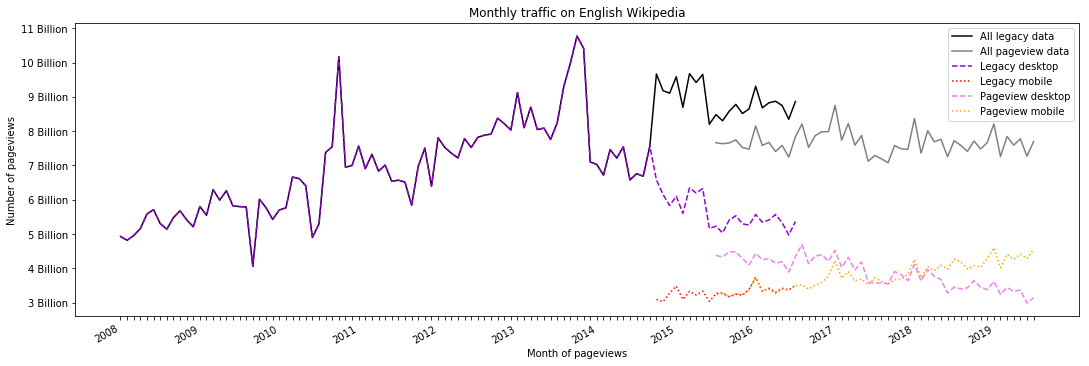

In [125]:
fig = plt.figure(1, figsize=(18,6))
ax = fig.add_subplot(1, 1, 1)

plt.title("Monthly traffic on English Wikipedia")
ax.set_ylabel("Number of pageviews")
ax.set_xlabel("Month of pageviews")

plt.plot(all_data["timestamp"], all_data["pagecount_all_views"], color="black", label = "All legacy data")
plt.plot(all_data["timestamp"], all_data["pageview_all_views"], color="grey", label = "All pageview data")

plt.plot(all_data["timestamp"], all_data["pagecount_desktop_views"], "--", color="darkviolet", label = "Legacy desktop")
plt.plot(all_data["timestamp"], all_data["pagecount_mobile_views"], ":", color="red", label = "Legacy mobile")
plt.plot(all_data["timestamp"], all_data["pageview_desktop_views"], "--", color="violet", label = "Pageview desktop")
plt.plot(all_data["timestamp"], all_data["pageview_mobile_views"], ":", color="orange", label = "Pageview mobile")

plt.legend()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))

fig.autofmt_xdate()

plt.savefig("en-wikipedia_traffic_200712-201809.png")
plt.show()